<h1> Data Analytics - 1 (Linear regression) </h1>

<h4> Problem Statement </h4>
<h5>Create a Linear Regression Model using Python/R to predict home
prices using Boston Housing .Dataset (https://www.kaggle.com/c/boston-housing). The Boston
Housing dataset contains information about various houses in Boston through different parameters.
There are 506 samples
and 14 feature variables in this dataset.The objective is to predict the value of prices of the house
using the given features.</h5>

In [21]:
# imports 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [7]:
temp = load_boston()

In [8]:
temp.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [10]:
data = pd.DataFrame(temp.data, columns=temp.feature_names)
target = pd.DataFrame(temp.target, columns=['MEDV'])

In [13]:
data["target"] = target
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
31,1.35472,0.0,8.14,0.0,0.5380,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
351,0.07950,60.0,1.69,0.0,0.4110,6.579,35.9,10.7103,4.0,411.0,18.3,370.78,5.49,24.1
357,3.84970,0.0,18.10,1.0,0.7700,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
123,0.15038,0.0,25.65,0.0,0.5810,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

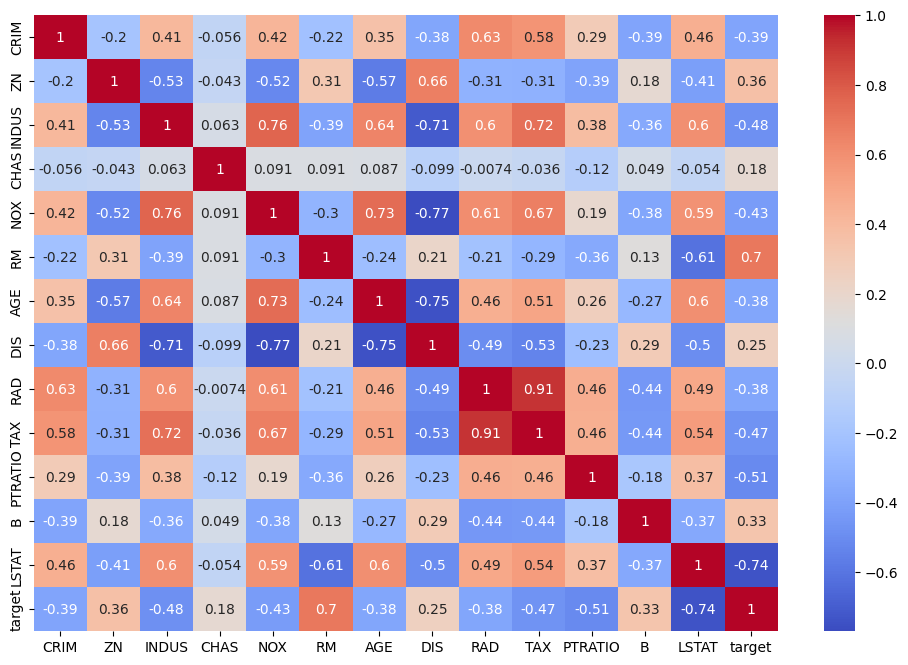

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot= True, cmap= 'coolwarm');

Features that affect target (High value for -ve or +ve corelation): 'LSTAT', 'RM', 'TAX', 'INDUS' 

In [19]:
train_df= data[['LSTAT', 'RM', 'TAX','INDUS','target']]

In [20]:
x = train_df[['LSTAT', 'RM', 'TAX', 'INDUS']]
y = train_df['target']

In [22]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

<h3> Training </h3>

In [25]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h3> Evaluation </h3>

In [26]:
y_pred = model.predict(x_test)

In [29]:
y_pred[:5]

array([17.93709135, 26.83168283, 28.0011609 , 26.92079525, 38.14498029])

In [35]:
y_test[:5]

465    19.9
314    23.8
272    24.4
82     24.8
364    21.9
Name: target, dtype: float64

In [32]:
mse = mean_squared_error(y_test, y_pred)
mse

27.519027800477765

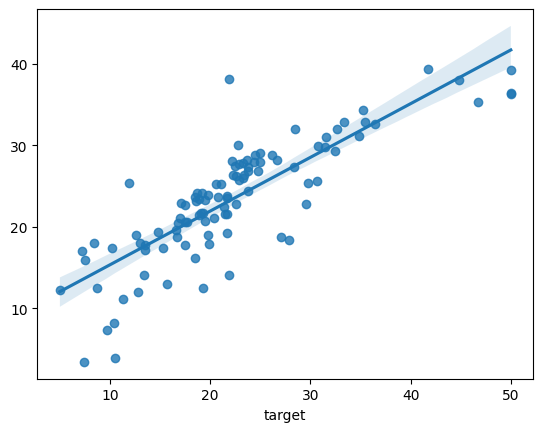

In [51]:
sns.regplot(x = y_test, y = y_pred, ci= 95);